In [37]:
#############################
#IMPORTS#
#############################
import sys
import os
pwd = os.getcwd()
root = pwd.rpartition("mo2016")[0] + pwd.rpartition("mo2016")[1] #/Volumes/mo2016/ or '/Users/mo2016/' or '/rds/general/mo2016/'


if root == '/Users/mo2016':
    modelling_ephemeral = '/Volumes/mo2016/ephemeral/Documents/modelling'
    modelling_home = '/Volumes/mo2016/home/Documents/modelling'
    modelling_local = root + '/Documents/modelling'
    import matplotlib as mpl
    mpl.use('tkagg')

if root == '/Volumes/mo2016' or root=='/rds/general': #'/rds/general' or root=='/Volumes':
        modelling_ephemeral = root + '/ephemeral/Documents/modelling'
        modelling_home = root  + '/home/Documents/modelling'
        modelling_local = modelling_home
modulepath = modelling_local + '/3954/modules/new_CN'
sys.path.append(modulepath)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [38]:

circuit_n=2
variant='5716gaussian'
shape='square'
mechanism = 'fullcircuit'
L=5; x_gridpoints =10; J = L*x_gridpoints
T =150; t_gridpoints = 100; N = T*t_gridpoints


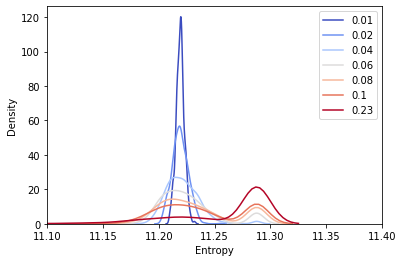

In [39]:
%matplotlib inline
var_list = [0.01,0.02,0.04,0.06,0.08,0.1,0.23]
color1=cm.coolwarm(np.linspace(0,1,len(var_list)))

fig, ax = plt.subplots()

for var,c in zip(var_list,color1):
    filename = 'circuit%r_variant%svar%r_%s_%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,var, shape,mechanism,L,J,T,N)
    hks= pickle.load( open(modelling_home + '/3954/numerical_confocal/results/entropy/EntropyDicts/HKSdict_%s.pkl'%filename, 'rb' ) )
    sns.kdeplot(data=list(hks.values()),color=c,label=var)
ax.legend()
# ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')


# plt.tight_layout()
plt.xlim(11.1,11.4)
plt.xlabel('Entropy')
plt.savefig('entropy_kde',  dpi=1200)


11.232299208480036 11.20937763652474
11.255036714508087 11.201892624179614
11.287712379549449 11.18713452492559
11.287712379549452 11.15159282705877
11.287712379549452 10.774865985622776
11.287712379549452 10.600958944671326
11.287712379549452 10.671371647099319
11.287712379549449 8.655381438461399


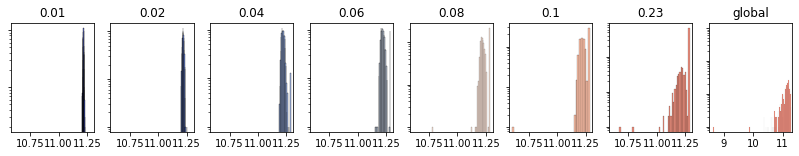

In [45]:
var_list = [0.01,0.02,0.04,0.06,0.08,0.1,0.23]


circuit_n=2
variant='5716gaussian'
shape='square'
mechanism = 'fullcircuit'
L=5; x_gridpoints =10; J = L*x_gridpoints
T =150; t_gridpoints = 100; N = T*t_gridpoints


count=0
zoom_std = []
zoom_diff = []
fig, axes = plt.subplots(1,8, figsize=(14,2))
color1=cm.coolwarm(np.linspace(0,1,len(var_list)+1))
for var,c in zip(var_list,color1):
    filename = 'circuit%r_variant%svar%r_%s_%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,var, shape,mechanism,L,J,T,N)
    hks= pickle.load( open(modelling_home + '/3954/numerical_confocal/results/entropy/EntropyDicts/HKSdict_%s.pkl'%filename, 'rb' ) )
    # print(max(hks.values()), min(hks.values()) )
    ar = np.array(list(hks.values()))
    zoom_std.append(np.nanstd(ar))
    print(max(hks.values()),min(hks.values()))
    zoom_diff.append(max(hks.values())-min(hks.values()))

    sns.histplot(data=list(hks.values()),  color=c, ax=axes[count] )
    axes[count].set_xlim(10.58,11.31)
    axes[count].set_yscale('log')
    axes[count].set_yticklabels([])
    axes[count].set(ylabel='')
    axes[count].set(title=var)
    # axes[count].set_xticklabels([])
    count+=1

    
    
circuit_n=2
variant=0
shape='square'
mechanism = 'fullcircuit'
L=5; x_gridpoints =10; J = L*x_gridpoints
T =2000; t_gridpoints = 10; N = T*t_gridpoints

filename = 'circuit%r_variant%s_%s_%s_L%r_J%r_T%r_N%r'%(circuit_n,variant, shape,mechanism,L,J,T,N)
hks= pickle.load( open(modelling_home + '/3954/numerical_confocal/results/entropy/EntropyDicts/HKS_dict_%s.pkl'%filename, 'rb' ) )

# print(max(hks.values()), min(hks.values()) )
    
    # np.amin(hks.values()), np.amax(hks.values()))
sns.histplot(data=list(hks.values()),  color=c, ax=axes[count] )
axes[count].set_xlim(8.5,11.31)
axes[count].set_yscale('log')
axes[count].set_yticklabels([])
axes[count].set(ylabel='')
axes[count].set(title='global')
ar = np.array(list(hks.values()))
zoom_std.append(np.nanstd(ar))
zoom_diff.append(max(hks.values())-min(hks.values()))
print(max(hks.values()),min(hks.values()))



# axes[count].set_xticklabels([])
count+=1
# plt.show()
# sns.histplot(data=list(hks.values()))
# plt.yscale('log')
# axes.set_ylim([0, 5])
plt.savefig('entropy_histogram_axis2', dpi=1200)

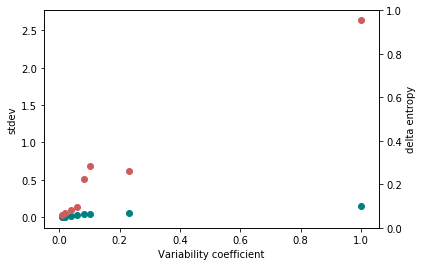

In [33]:
var_list = [0.01,0.02,0.04,0.06,0.08,0.1,0.23,1]
fig, ax = plt.subplots()
ax.scatter(var_list,zoom_std, c='teal')
ax.scatter(var_list,zoom_diff,c='indianred')
ax1=ax.twinx()
ax.set_xlabel('Variability coefficient')
ax.set_ylabel('stdev')
ax1.set_ylabel('delta entropy')
plt.savefig('stedv-diff_distribution.png')

In [7]:
ar = np.array(list(hks.values()))
np.nanstd(ar)

0.1487756174867986

In [19]:
min(hks.values())

11.20937763652474